In [2]:
#import the libraries
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#load the data and split it into train and test sets
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11493376/11490434 [==============================] - 28s 2us/step


In [5]:
#Get the image shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


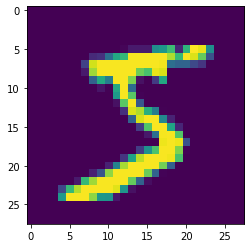

In [8]:
#see the first image
an_image=x_train[0]
plt.imshow(an_image)

In [9]:
#Reshape the data to fit the model
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [14]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [16]:
#One -hot Encoding: covert labels into a set of 10 numbers to give input into the neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

#instead of label 5 we are gonna see a value of 1 at the index 5
#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
#Built the CNN model

#create architecture
model=Sequential() 
#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

W0315 21:40:43.317579  5848 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0315 21:40:44.168081  5848 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0315 21:40:44.378535  5848 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [18]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

W0315 21:42:09.900076  5848 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\deep_learning\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0315 21:42:09.988056  5848 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
#Train the model

hist=model.fit(x_train,y_train_one_hot, validation_data=(x_test,y_test_one_hot),epochs=3) #default batch size 32

W0315 21:44:21.722872  5848 deprecation.py:323] From C:\Users\User\Anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0315 21:44:21.842840  5848 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\deep_learning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 143s 2ms/step - loss: 0.3224 - acc: 0.9463 - val_loss: 0.0799 - val_acc: 0.9752
Epoch 2/3
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0660 - acc: 0.9797 - val_loss: 0.0692 - val_acc: 0.9788
Epoch 3/3
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0461 - acc: 0.9851 - val_loss: 0.0842 - val_acc: 0.9795


{'val_loss': [0.07994390570167452, 0.06915790700973011, 0.08418001528813475], 'val_acc': [0.9752, 0.9788, 0.9795], 'loss': [0.3224011679955603, 0.06600203115603266, 0.04609558855126379], 'acc': [0.94635, 0.9797166666666667, 0.9850833333333333]}


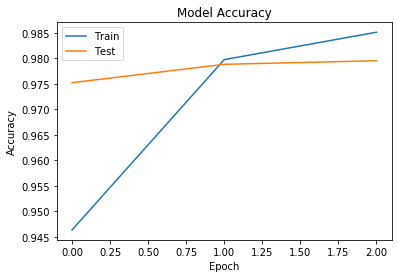

In [22]:
#visualize the model's accuracy

print(hist.history)

plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')

In [23]:
#show predictions as probabilities for the first four images

predictions=model.predict(x_test[:4])
predictions

array([[5.05412656e-11, 2.99453444e-18, 2.28893252e-10, 4.40489885e-08,
        3.40478688e-21, 1.92554509e-14, 1.27392778e-20, 1.00000000e+00,
        1.39054523e-09, 6.63649483e-11],
       [5.33277242e-12, 1.56657188e-05, 9.99984384e-01, 3.60265762e-10,
        1.23769452e-12, 4.23524812e-17, 7.80302045e-09, 1.33188992e-13,
        1.11681842e-09, 1.03510470e-17],
       [2.13267377e-08, 9.99728262e-01, 2.44086948e-07, 1.07412799e-08,
        2.23879048e-04, 3.78154198e-07, 1.33929845e-07, 1.43732495e-05,
        3.26142290e-05, 2.53811585e-08],
       [9.99998212e-01, 7.45718834e-11, 5.77913850e-09, 5.12612262e-12,
        9.90000348e-09, 3.32245169e-11, 1.81507266e-06, 2.87631585e-09,
        7.15215842e-09, 1.78047943e-09]], dtype=float32)

In [25]:
#print our predictions as number labels
print(np.argmax(predictions,axis=1))

#print actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


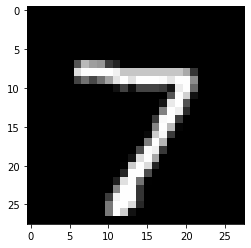

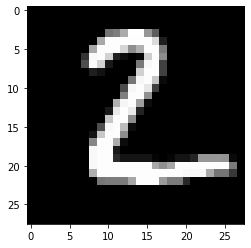

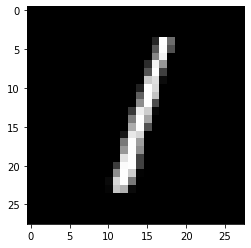

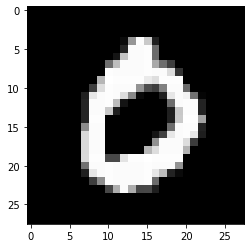

In [34]:
#show first four images as pictures
for i in range(4):
    image=x_test[i]
    image=np.array(image,dtype='float')
    pixels=image.reshape(28,28)
    plt.imshow(pixels,cmap='gray')
    plt.show()